# **Project: Analyzing Income Patterns and Socioeconomic Factors to Find Donors for Charity**

## **Problem**
In this project, we will apply explainatory data analysis and machine learning algorithms to accurately identify the individuals income using data collected from the 1994 U.S. Census. we will choose the best algorithm by comparing results and try to optimize that algorithm to best model the data. Our goal is to construct a model that can predicts whether and idividual makes more than $50,000. This can help funding organizations that survive on donations, understanding an individual income can help idenfity the quantity of donation to request.


## **Data source**
The dataset can be found [here.](https://archive.ics.uci.edu/dataset/20/census+income)

---

## **Data Exploration**

- The dataset contains **45,222** data points and **14** features, providing demographic and financial information about individuals.
- Below is a detailed explanation of each column to help understand the data better:

**Features**
- `age`: Age
- `workclass`: Working Class (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)
- `education_level`: Level of Education (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool)
- `education-num`: Number of educational years completed
- `marital-status`: Marital status (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)
- `occupation`: Work Occupation (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)
- `relationship`: Relationship Status (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)
- `race`: Race (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)
- `sex`: Sex (Female, Male)
- `capital-gain`: Monetary Capital Gains
- `capital-loss`: Monetary Capital Losses
- `hours-per-week`: Average Hours Per Week Worked
- `native-country`: Native Country (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands)

**Target Variable**
- `income`: Income Class (<=50K, >50K)

In [2]:
# Importing libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from scipy.stats import shapiro

In [12]:
# Loading data set
data = pd.read_csv("/kaggle/input/donors/census.csv")
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


 - **5** numeric and **9** categorical features

In [4]:
data.describe() # for numeric columns

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [5]:
data.describe(include='object') # for categorical columns

,workclass,education_level,marital-status,occupation,relationship,race,sex,native-country,income
count,45222,45222,45222,45222,45222,45222,45222,45222,45222
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,33307,14783,21055,6020,18666,38903,30527,41292,34014


## **Handling Missing Values and Duplicates**

In [6]:
print(" number of nulls in the data is " ,data.isna().sum().sum())

 number of nulls in the data is  0


In [13]:
print(" number of duplications in the data is " ,data.duplicated().sum())
# now we will drop the duplicates ( but later when we train the model may return them and compare the accuracy with it and without it )
data.drop_duplicates(inplace=True)
print(" number of duplications in the data after cleaning is " ,data.duplicated().sum())

 number of duplications in the data is  5982
 number of duplications in the data after cleaning is  0


## **Visualizations and insights**

### Distributions for numercal columns

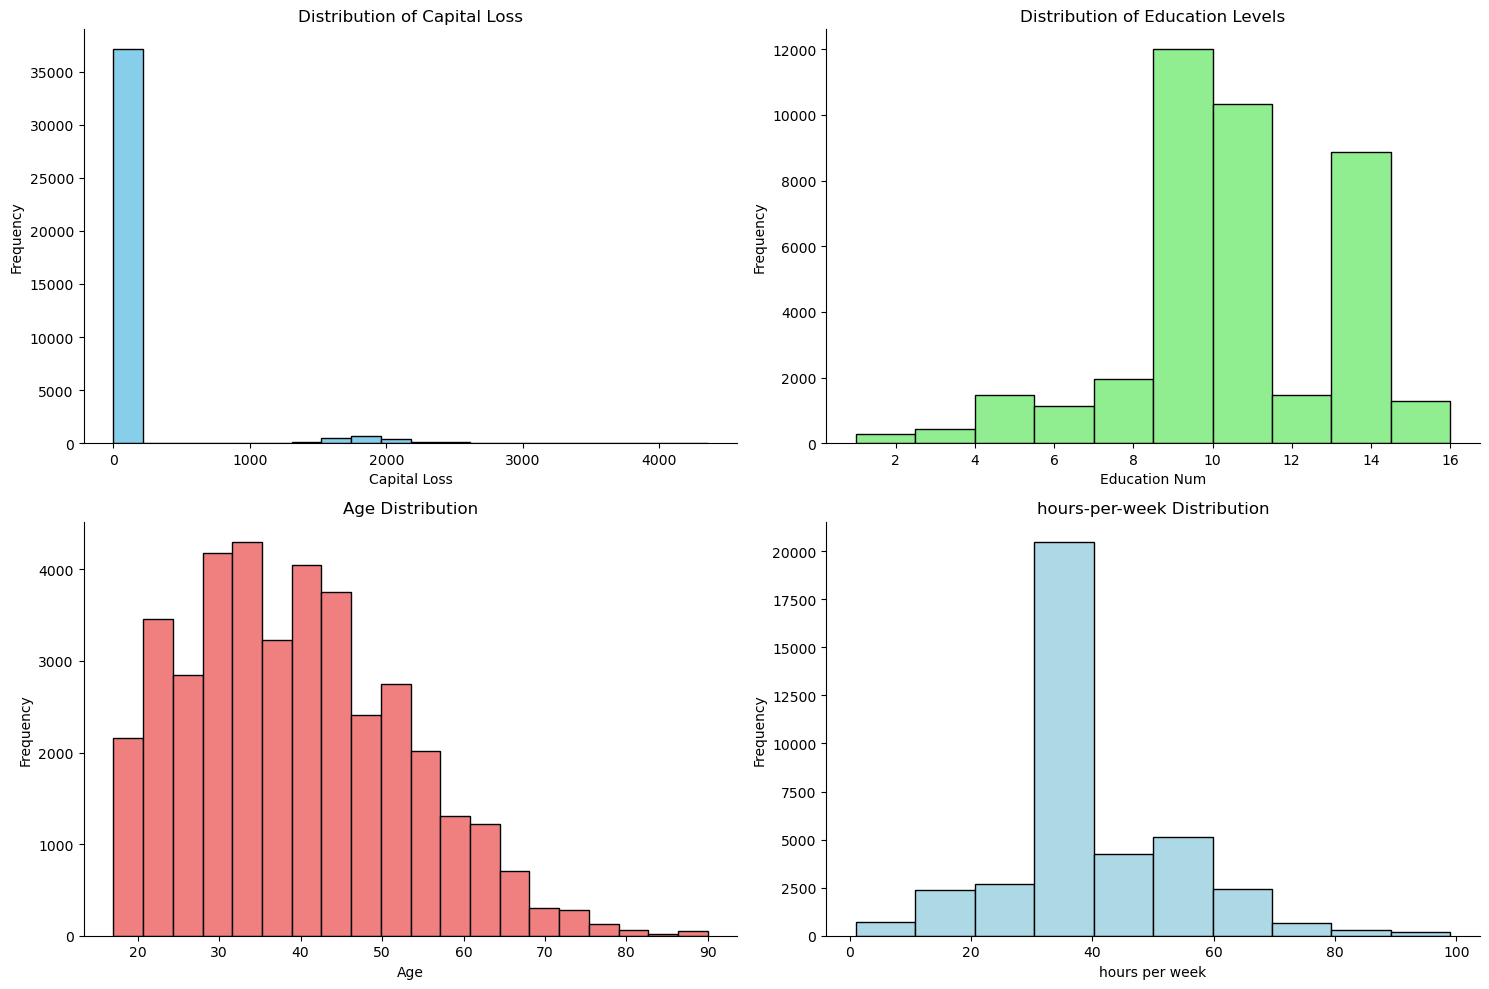

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot histogram for 'capital-loss'
axes[0, 0].hist(data['capital-loss'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Capital Loss')
axes[0, 0].set_xlabel('Capital Loss')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].spines[['top', 'right']].set_visible(False)

# Plot histogram for 'education-num'
axes[0, 1].hist(data['education-num'], color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Distribution of Education Levels')
axes[0, 1].set_xlabel('Education Num')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].spines[['top', 'right']].set_visible(False)

# Plot histogram for 'age'
axes[1, 0].hist(data['age'], bins=20, color='lightcoral', edgecolor='black')
axes[1, 0].set_title('Age Distribution')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].spines[['top', 'right']].set_visible(False)

# Plot histogram for 'education-num'
axes[1, 1].hist(data['hours-per-week'], bins=10, color='lightblue', edgecolor='black')
axes[1, 1].set_title('hours-per-week Distribution')
axes[1, 1].set_xlabel('hours per week')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].spines[['top', 'right']].set_visible(False)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

- **Looking at the histograms we can conclude that**:
  -  the majority of people have had completed **10** educational years by studying the `Education-num` feature
  - the majority of people ages are between **30 - 35**
  - the majority of people work for approximatly **40 hours per week**
  - the majority of people have **0 capital loss**

### **Distributions for categorical columns**

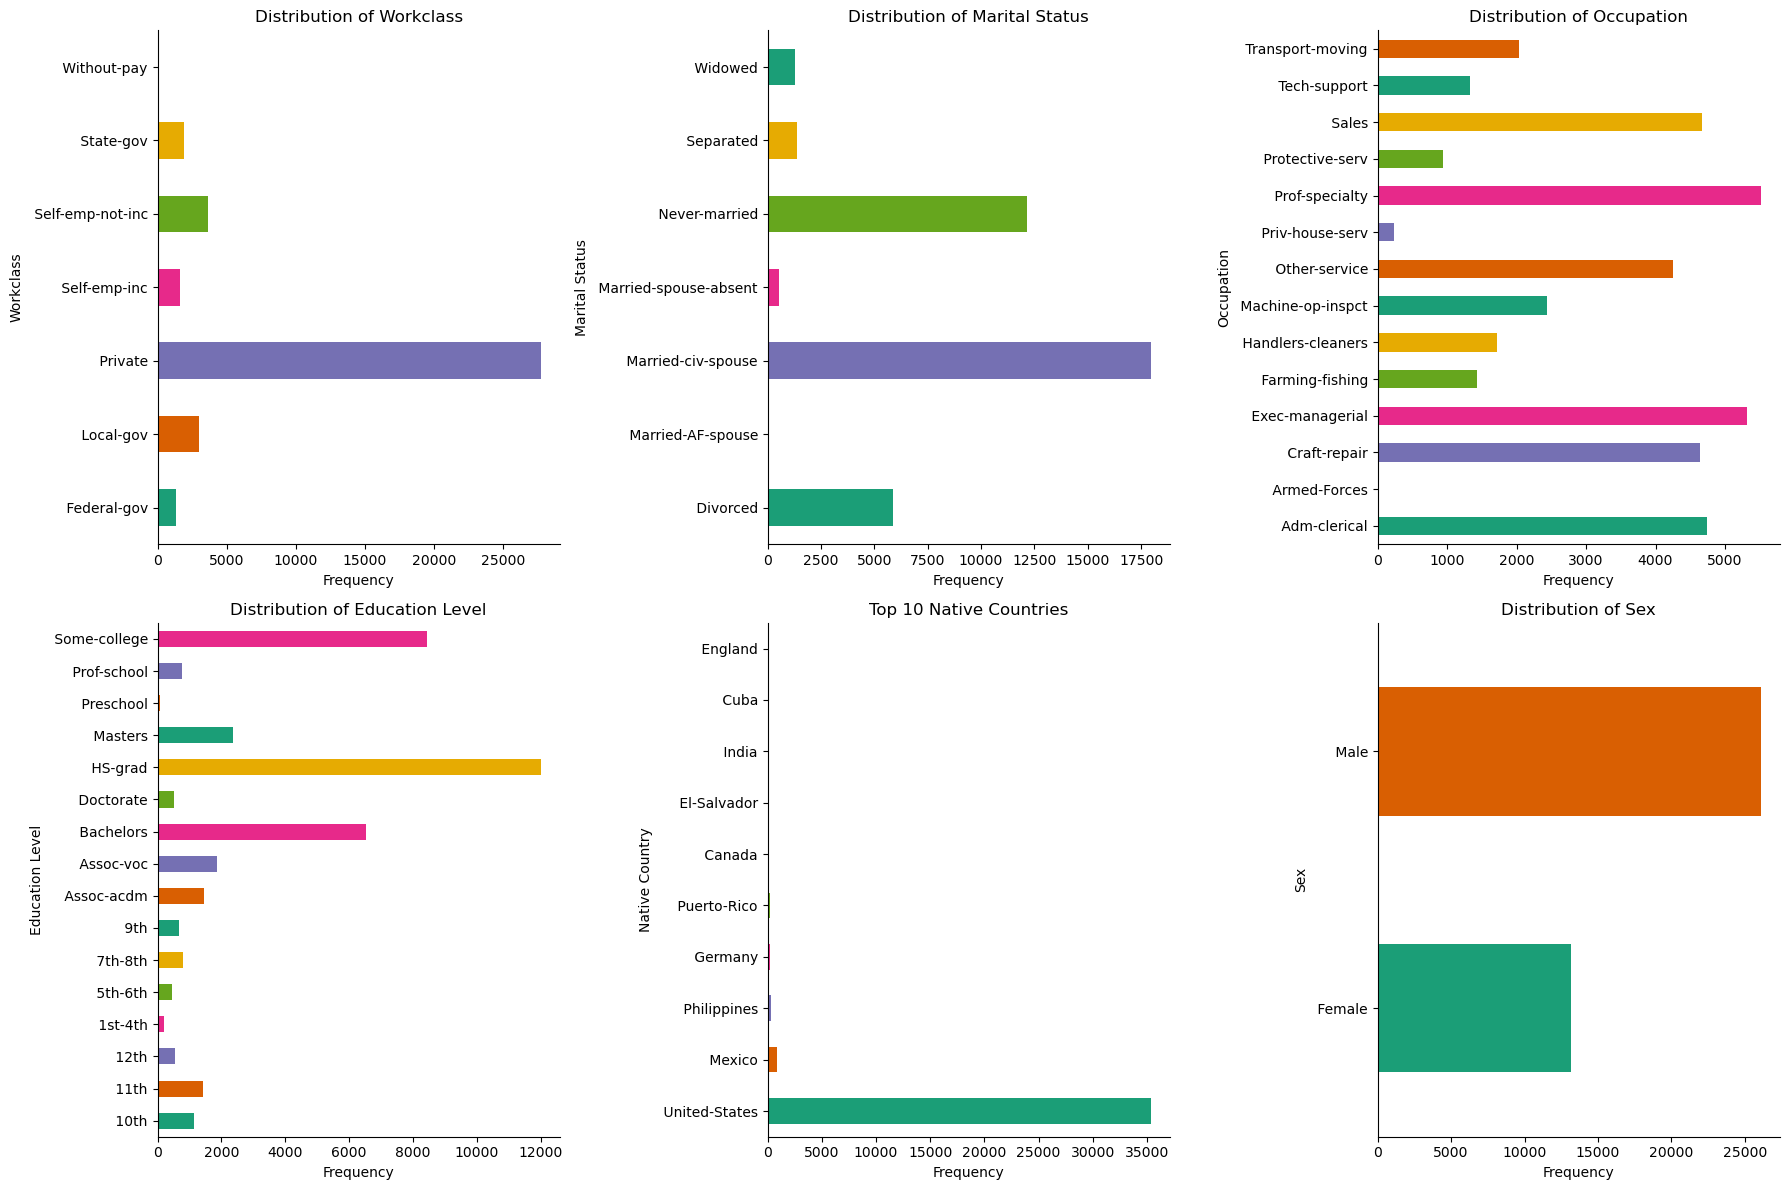

In [9]:
# Set a consistent color palette
palette = sns.palettes.mpl_palette('Dark2')

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot for 'workclass'
data.groupby('workclass').size().plot(kind='barh', color=palette, ax=axes[0, 0], title='Distribution of Workclass')
axes[0, 0].spines[['top', 'right']].set_visible(False)
axes[0, 0].set_xlabel('Frequency')
axes[0, 0].set_ylabel('Workclass')

# Plot for 'marital-status'
data.groupby('marital-status').size().plot(kind='barh', color=palette, ax=axes[0, 1], title='Distribution of Marital Status')
axes[0, 1].spines[['top', 'right']].set_visible(False)
axes[0, 1].set_xlabel('Frequency')
axes[0, 1].set_ylabel('Marital Status')

# Plot for 'occupation'
data.groupby('occupation').size().plot(kind='barh', color=palette, ax=axes[0, 2], title='Distribution of Occupation')
axes[0, 2].spines[['top', 'right']].set_visible(False)
axes[0, 2].set_xlabel('Frequency')
axes[0, 2].set_ylabel('Occupation')

# Plot for 'education level'
data.groupby('education_level').size().plot(kind='barh', color=palette, ax=axes[1, 0], title='Distribution of Education Level')
axes[1, 0].spines[['top', 'right']].set_visible(False)
axes[1, 0].set_xlabel('Frequency')
axes[1, 0].set_ylabel('Education Level')

# Plot for top 10 'native-country'
data['native-country'].value_counts().head(10).plot(kind='barh', color=palette, ax=axes[1, 1], title='Top 10 Native Countries')
axes[1, 1].spines[['top', 'right']].set_visible(False)
axes[1, 1].set_xlabel('Frequency')
axes[1, 1].set_ylabel('Native Country')

# Plot for 'sex'
data.groupby('sex').size().plot(kind='barh', color=palette, ax=axes[1, 2], title='Distribution of Sex')
axes[1, 2].spines[['top', 'right']].set_visible(False)
axes[1, 2].set_xlabel('Frequency')
axes[1, 2].set_ylabel('Sex')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


In [14]:
# Convert the 'income' column to integer using LabelEncoder
data['income'] = LabelEncoder().fit_transform(data['income'])
data["income"].value_counts()

income
0    29265
1     9975
Name: count, dtype: int64

- we should consider that our dataset imbalanced (we may handle it later in modeling by SMOT or weight parameter)

In [12]:
#income is now a numerical column
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39240 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              39240 non-null  int64  
 1   workclass        39240 non-null  object 
 2   education_level  39240 non-null  object 
 3   education-num    39240 non-null  float64
 4   marital-status   39240 non-null  object 
 5   occupation       39240 non-null  object 
 6   relationship     39240 non-null  object 
 7   race             39240 non-null  object 
 8   sex              39240 non-null  object 
 9   capital-gain     39240 non-null  float64
 10  capital-loss     39240 non-null  float64
 11  hours-per-week   39240 non-null  float64
 12  native-country   39240 non-null  object 
 13  income           39240 non-null  int32  
dtypes: float64(4), int32(1), int64(1), object(8)
memory usage: 4.3+ MB


In [17]:
#grouping numerical features together
numeric_cols = data.select_dtypes(include=['int64', 'float64'])
numeric_cols.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income
0,39,13.0,2174.0,0.0,40.0,0
1,50,13.0,0.0,0.0,13.0,0
2,38,9.0,0.0,0.0,40.0,0
3,53,7.0,0.0,0.0,40.0,0
4,28,13.0,0.0,0.0,40.0,0


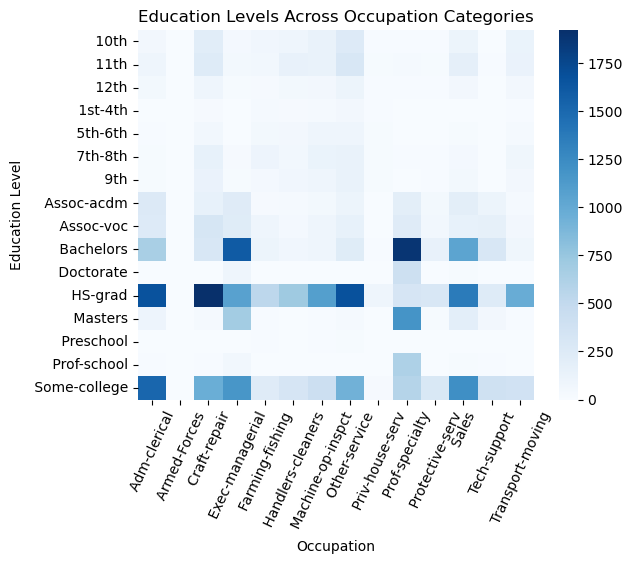

In [14]:
# Cross-tabulate education levels and occupation
edu_occ_freq = pd.crosstab(data['education_level'], data['occupation'])

# Heatmap
sns.heatmap(edu_occ_freq, cmap='Blues', annot=False, fmt='d', cbar=True)
plt.title('Education Levels Across Occupation Categories')
plt.xlabel('Occupation')
plt.ylabel('Education Level')
plt.xticks(rotation=65)
plt.show()

C:\Users\myacoubalex\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


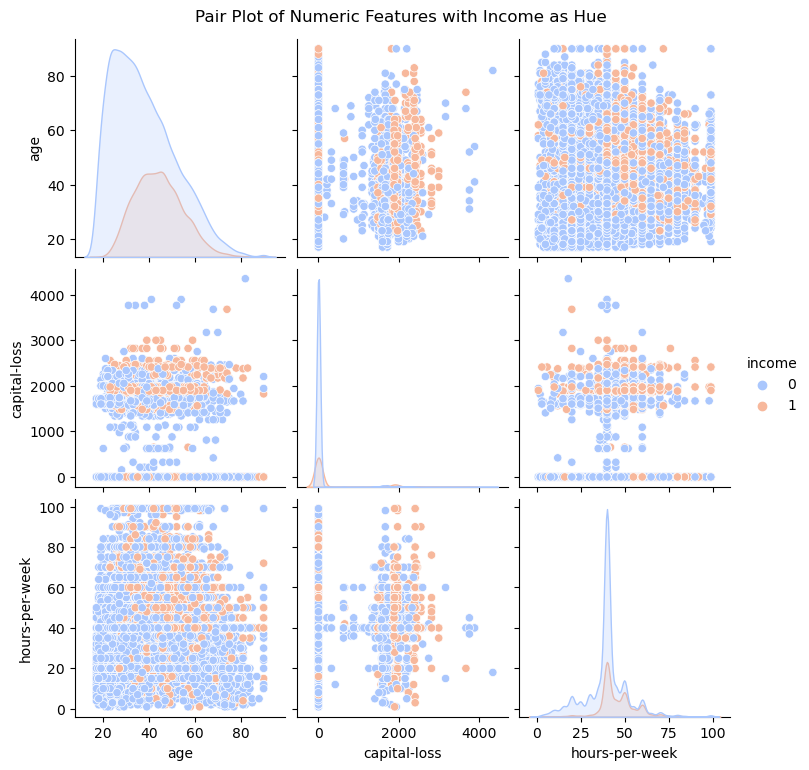

In [15]:
sns.pairplot(data, vars=['age', 'capital-loss', 'hours-per-week'], hue='income', palette='coolwarm')
plt.suptitle('Pair Plot of Numeric Features with Income as Hue', y=1.02)
plt.show()

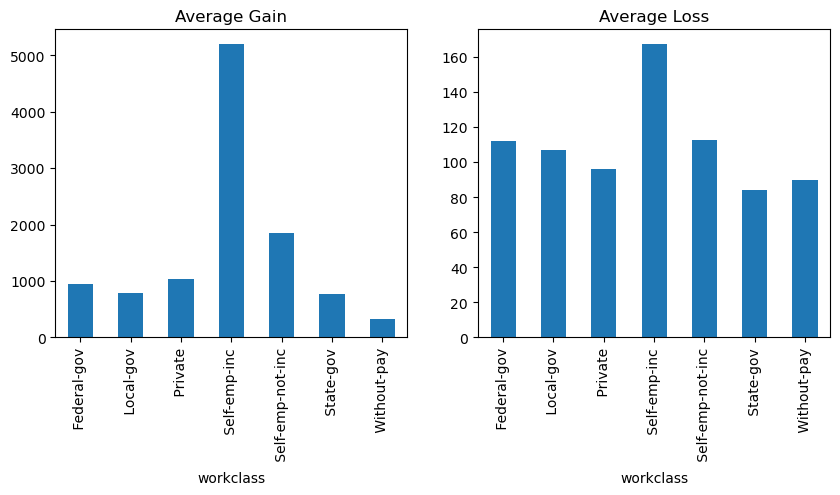

In [16]:
gain = data.groupby(data["workclass"])["capital-gain"].mean()
loss = data.groupby(data["workclass"])["capital-loss"].mean()

plt.figure(figsize = [10,4])

plt.subplot(1 , 2 , 1)
gain.plot(kind = "bar")
plt.title("Average Gain");

plt.subplot(1 , 2 , 2)
loss.plot(kind = "bar")
plt.title("Average Loss");

<Axes: xlabel='age', ylabel='hours-per-week'>

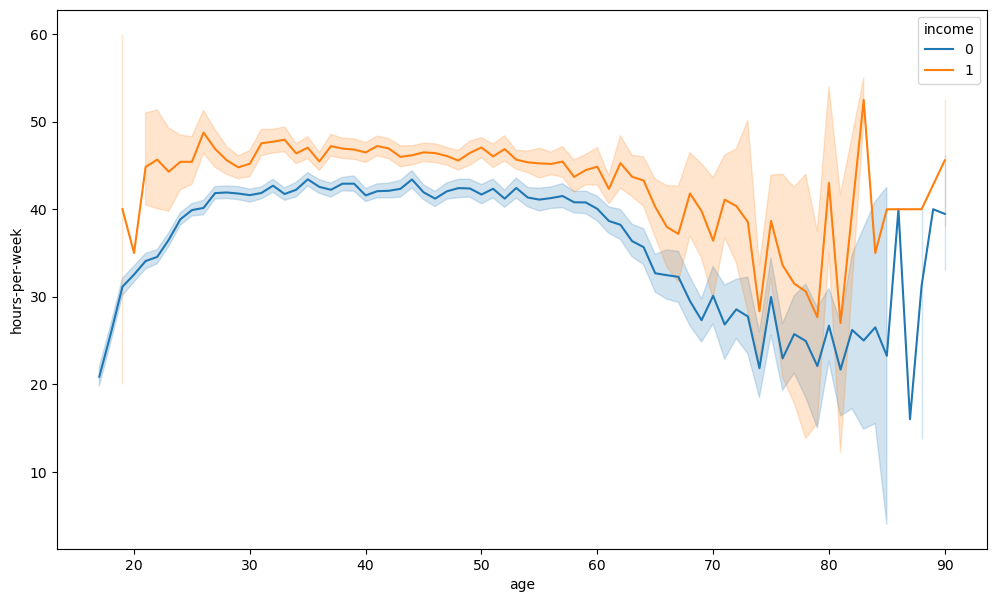

In [17]:
# show the avg hours work by income and age

plt.figure(figsize=(12,7))
sns.lineplot(data=data,x="age",y="hours-per-week",hue="income")

### Checking the normality by (Shapiro-Wilk Test by P-value)

C:\Users\myacoubalex\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Feature 'age' is NOT normally distributed (p = 0.00000).
Feature 'workclass' is not numeric, skipping Shapiro-Wilk test.
Feature 'education_level' is not numeric, skipping Shapiro-Wilk test.
Feature 'education-num' is NOT normally distributed (p = 0.00000).
Feature 'marital-status' is not numeric, skipping Shapiro-Wilk test.
Feature 'occupation' is not numeric, skipping Shapiro-Wilk test.
Feature 'relationship' is not numeric, skipping Shapiro-Wilk test.
Feature 'race' is not numeric, skipping Shapiro-Wilk test.
Feature 'sex' is not numeric, skipping Shapiro-Wilk test.
Feature 'capital-gain' is NOT normally distributed (p = 0.00000).
Feature 'capital-loss' is NOT normally distributed (p = 0.00000).
Feature 'hours-per-week' is NOT normally distributed (p = 0.00000).
Feature 'native-country' is not numeric, skipping Shapiro-Wilk test.
Feature 'income' is NOT normally distributed (p = 0.00000).

Number of non-normal features: 6 out of 14
Proportion of non-normal features: 42.86%


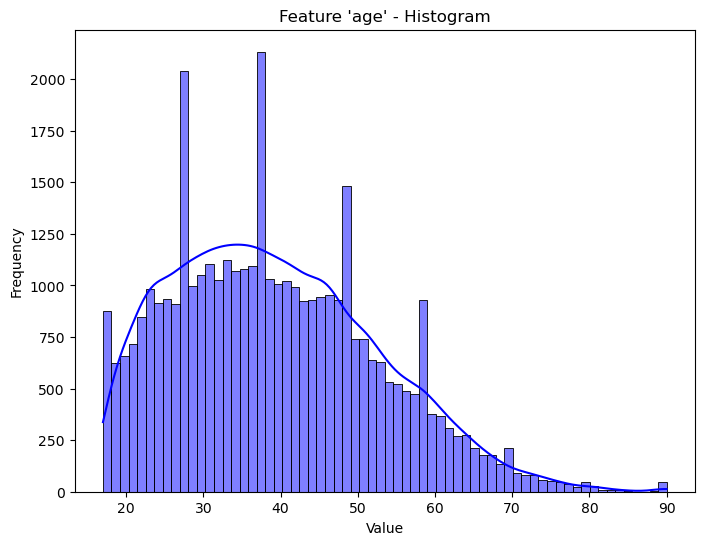

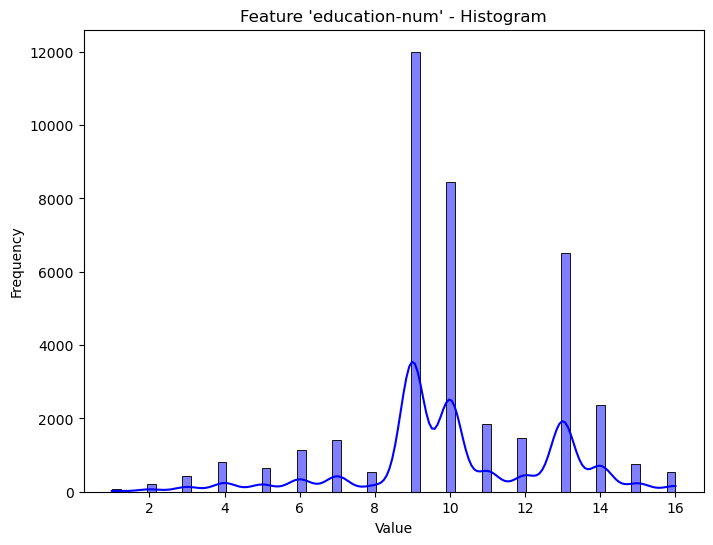

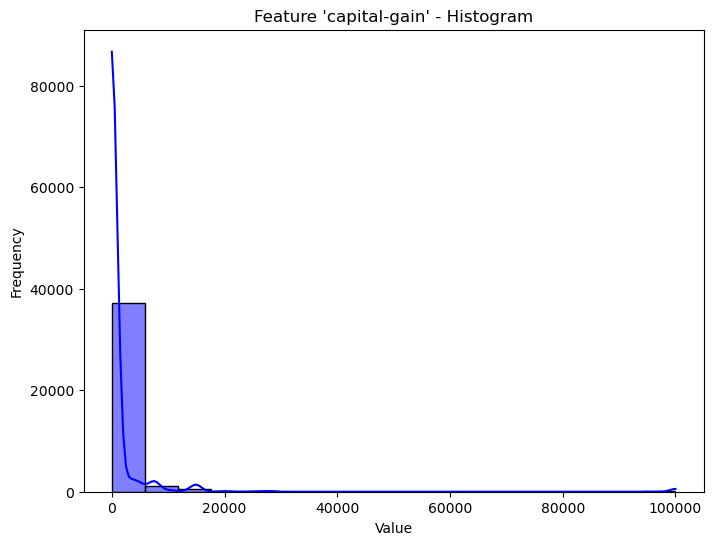

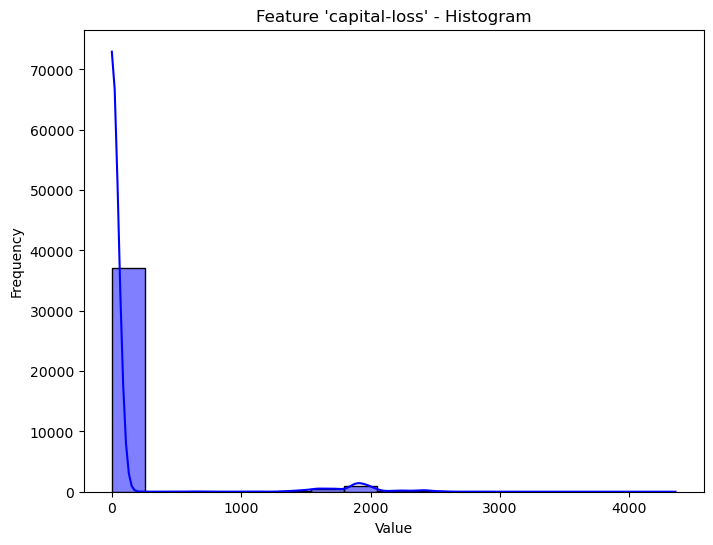

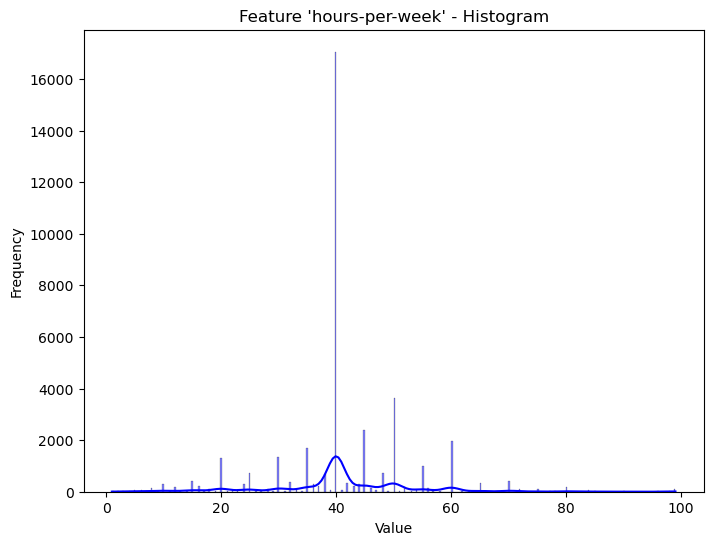

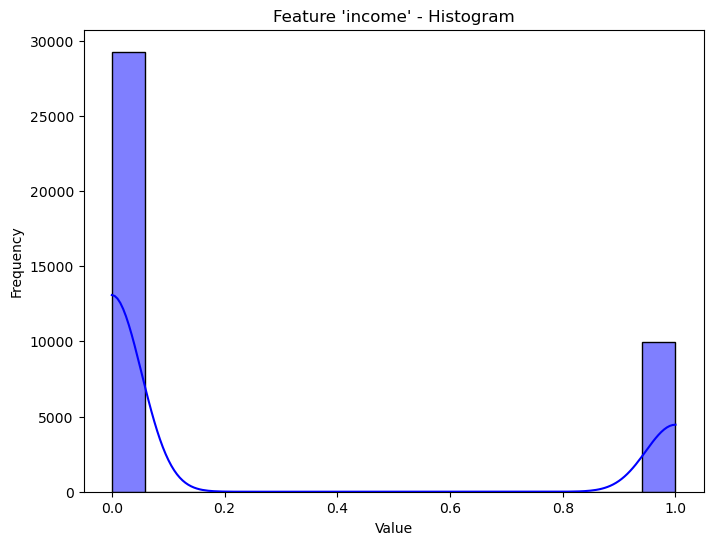

In [18]:
# Set a significance level for the normality test
alpha = 0.05  # 5% significance level

# Initialize a list to store results
non_normal_features = []

# Iterate through each column in the dataset
for column in data.columns:
    # Ensure the column contains numeric data
    if pd.api.types.is_numeric_dtype(data[column]):
        # Remove or fill NaN values before testing
        column_data = data[column].dropna()  # Dropping NaN values

        # Perform the Shapiro-Wilk test
        if len(column_data) >= 3:  # Shapiro test needs at least 3 data points
            stat, p_value = shapiro(column_data)

            # Check if the p-value is below the significance level (alpha)
            if p_value < alpha:
                non_normal_features.append(column)
                print(f"Feature '{column}' is NOT normally distributed (p = {p_value:.5f}).")
            else:
                print(f"Feature '{column}' is normally distributed (p = {p_value:.5f}).")
        else:
            print(f"Feature '{column}' has fewer than 3 data points, skipping Shapiro-Wilk test.")
    else:
        print(f"Feature '{column}' is not numeric, skipping Shapiro-Wilk test.")

# Summary of non-normal features
print(f"\nNumber of non-normal features: {len(non_normal_features)} out of {data.shape[1]}")
print(f"Proportion of non-normal features: {len(non_normal_features) / data.shape[1]:.2%}")

# Visualize distributions of non-normal features
for column in non_normal_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True, color="blue")
    plt.title(f"Feature '{column}' - Histogram")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

## **Prepare data for modeling**

#### 1. Check the skewness

In [18]:
# in numeric columns only
# Skewness indicates that the distribution of data is not symmetrical and may have a long tail on one side.
skewness = data[numeric_cols.columns].skew()
skewness

age                0.513322
education-num     -0.357197
capital-gain      11.045685
capital-loss       4.181972
hours-per-week     0.358671
income             1.129063
dtype: float64

In [19]:
# Highly Positive Skew in (capital-gain 11.05 ,capital-loss 4.18 )
data['capital-gain'] = np.log1p(data['capital-gain'])  # Apply log(x + 1) transformation
data['capital-loss'] = np.log1p(data['capital-loss'])  # Apply log(x + 1) transformation

In [20]:
data[numeric_cols.columns].skew()

age               0.513322
education-num    -0.357197
capital-gain      2.825415
capital-loss      3.949030
hours-per-week    0.358671
income            1.129063
dtype: float64

### 2- features Scaling

In [21]:
data.describe() # notice the min and max of each feature before scale

,age,education-num,capital-gain,capital-loss,hours-per-week,income
count,39240.000000,39240.000000,39240.000000,39240.000000,39240.000000,39240.000000
mean,39.309225,10.136290,0.844753,0.406404,41.206091,0.254205
std,13.298041,2.637194,2.616664,1.700262,12.458021,0.435419
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000,1.000000
max,90.000000,16.000000,11.512925,8.379539,99.000000,1.000000


In [22]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # default=(0, 1)
data[['age', 'capital-gain', 'capital-loss', 'hours-per-week','education-num']] = scaler.fit_transform(data[['age', 'capital-gain', 'capital-loss', 'hours-per-week','education-num']])

In [23]:
data.describe() # after standrize the numeric features

,age,education-num,capital-gain,capital-loss,hours-per-week,income
count,39240.000000,39240.000000,39240.000000,39240.000000,39240.000000,39240.000000
mean,0.305606,0.609086,0.073374,0.048500,0.410266,0.254205
std,0.182165,0.175813,0.227281,0.202906,0.127123,0.435419
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.164384,0.533333,0.000000,0.000000,0.397959,0.000000
50%,0.287671,0.600000,0.000000,0.000000,0.397959,0.000000
75%,0.424658,0.800000,0.000000,0.000000,0.448980,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3- Encoding categorical columns

In [24]:
# Label encoding for binary columns
le = LabelEncoder()
# data['income'] = le.fit_transform(data['income']) # we applied it before
data['sex'] = le.fit_transform(data['sex'])

# One-hot encoding for multi-class categorical columns with integer dtype
data = pd.get_dummies(data, columns=['workclass', 'education_level', 'marital-status',
                                     'occupation', 'relationship', 'race', 'native-country'],
                      drop_first=True, dtype=int)

In [26]:
print(data.shape)
data.head()

(39240, 96)


,age,education-num,sex,capital-gain,capital-loss,hours-per-week,income,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,1,0.667492,0.0,0.397959,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,1,0.000000,0.0,0.122449,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,1,0.000000,0.0,0.397959,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,1,0.000000,0.0,0.397959,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0,0.000000,0.0,0.397959,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Split the Data into Training and Testing Sets


In [25]:
# Features (X) and target (y)
X = data.drop('income', axis=1)  # Dropping the target column 
y = data['income']  # Target variable

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,1,0.667492,0.0,0.397959,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,1,0.000000,0.0,0.122449,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,1,0.000000,0.0,0.397959,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,1,0.000000,0.0,0.397959,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0,0.000000,0.0,0.397959,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,0.424658,0.866667,1,0.000000,0.0,0.397959,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45217,0.219178,0.800000,1,0.000000,0.0,0.397959,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45218,0.301370,0.800000,0,0.000000,0.0,0.357143,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45220,0.369863,0.800000,1,0.747375,0.0,0.397959,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45216    0
45217    0
45218    0
45220    0
45221    1
Name: income, Length: 39240, dtype: int64

In [30]:
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 31392 samples.
Testing set has 7848 samples.


## **Modeling**

**Naive Predictor Performance**
If we chose a model that always predicted an individual made more than $50,000, what would that model's accuracy and F-score be on this dataset?
The purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like.

In [ ]:
TP = np.sum(y) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data
# encoded to numerical values done in the data preprocessing step.
FP = y.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# Calculate accuracy, precision and recall

accuracy = TP/y.count()
recall = TP/(TP+FN)
precision = TP/(TP+FP)

# Calculate F-score for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = (1+beta**2)*(precision*recall)/((beta**2)*precision + recall)

# Print the results
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2542, F-score: 0.2988]


## KNN 

### k-nearest neighbors algorithm
**pros**
- No training phase: It’s a non-parametric model, meaning it doesn’t require explicit training. All the data points are stored, and predictions are made during the testing phase.
- Adaptive to the data: K-NN can adapt to the distribution of the data and doesn’t require prior assumptions (e.g., linearity or normality).

**cons**
- Requires feature scaling and senstive to noise
- K-NN can suffer from the curse of dimensionality
- Computationally expensive: As the number of data points increases, the distance calculation and sorting become slower. This makes K-NN inefficient for large datasets.

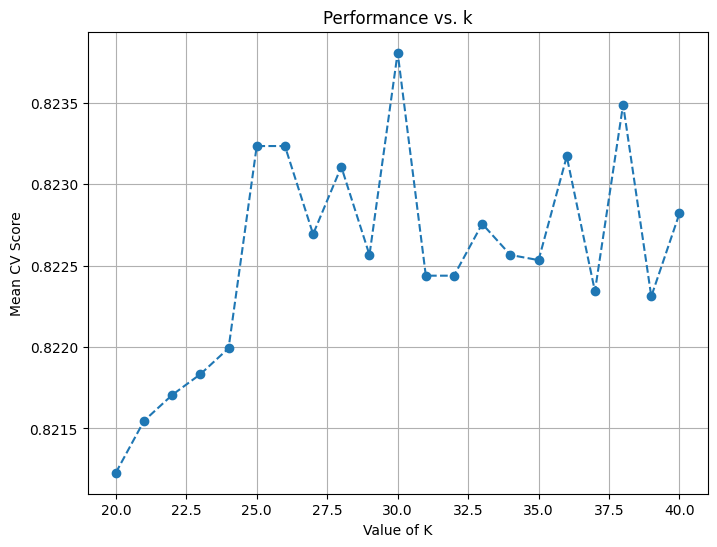

Optimal K:  30


In [30]:
k_range = range(20, 41)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(np.mean(cv_scores))

# Plot K vs Accuracy
plt.figure(figsize=(8, 6))
plt.plot(k_range, scores, marker='o', linestyle='--')
plt.xlabel('Value of K')
plt.ylabel('Mean CV Score')
plt.title('Performance vs. k')
plt.grid()
plt.show()


optimal_k = k_range[np.argmax(scores)]
print("Optimal K: ",optimal_k)


In [31]:
# make KNN with differences metrics
distance_metrics = ['euclidean', 'manhattan']
metric_performance = {}

for metric in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors=optimal_k, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    metric_performance[metric] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1}

print(pd.DataFrame(metric_performance).T)

           accuracy  precision    recall  f1_score
euclidean  0.827727   0.820592  0.827727  0.822562
manhattan  0.829511   0.822253  0.829511  0.824098


The KNN model shows similar performance with both Euclidean and Manhattan distances, but Manhattan slightly outperforms Euclidean in all metrics. Manhattan achieves an accuracy of 82.95%, while Euclidean has 82.77%. The precision, recall, and F1-score also favor Manhattan, though both metrics perform well overall.

Training Accuracy: 0.8359136085626911
Training F1 Score: 0.8303473938078764
Testing Accuracy: 0.8277268093781855
Testing F1 Score: 0.8225616622738382

Classification Report (Testing Set):
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      5883
           1       0.69      0.58      0.63      1965

    accuracy                           0.83      7848
   macro avg       0.78      0.74      0.76      7848
weighted avg       0.82      0.83      0.82      7848



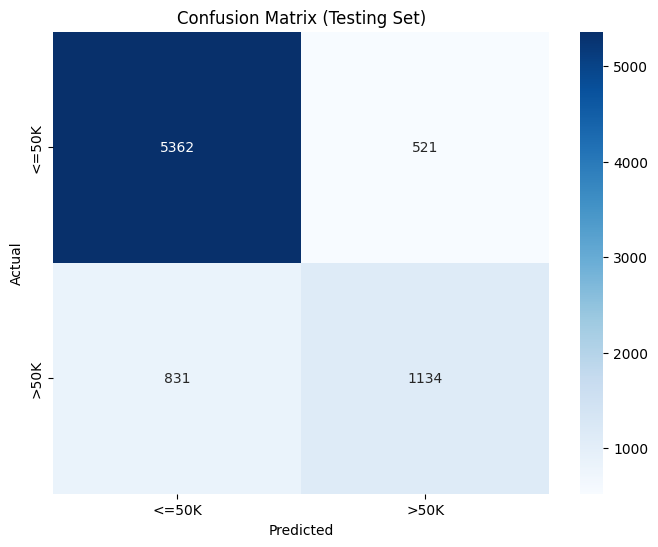

In [32]:
# KNN Model with optimal K
knn_final = KNeighborsClassifier(n_neighbors=optimal_k)
knn_final.fit(X_train, y_train)

#model evaluation

# Predictions for the training set
y_pred_train = knn_final.predict(X_train)  # Use 'knn_final' as the trained model

# Predictions for the testing set
y_pred_test = knn_final.predict(X_test)  # Use 'knn_final' as the trained model

# Calculate accuracy and F1 score for the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train, average='weighted')  # Use 'weighted' to account for imbalanced classes

# Calculate accuracy and F1 score for the testing set
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test, average='weighted')  # Use 'weighted' to account for imbalanced classes

# Classification report and confusion matrix for the testing set
report_test = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Print training and testing performance
print("Training Accuracy:", accuracy_train)
print("Training F1 Score:", f1_train)
print("Testing Accuracy:", accuracy_test)
print("Testing F1 Score:", f1_test)

# Print Classification Report for testing set
print("\nClassification Report (Testing Set):\n", report_test)

# Plot Confusion Matrix for the testing set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Testing Set)')
plt.show()


The model demonstrates strong performance, with training accuracy of 83.59% and testing accuracy of 82.79%. The F1 score is also consistent, with 83.03% on the training set and 82.24% on the testing set. The classification report for the testing set reveals that class <=50K , the majority class, performs well with a precision of 0.87, recall of 0.91, and F1 score of 0.89. In contrast, class >50K, the minority class, shows lower performance with a precision of 0.69, recall of 0.57, and F1 score of 0.63. The overall accuracy is 83%, and the weighted average shows strong performance due to the dominance of class <=50K in the dataset. The macro average, which treats all classes equally, reveals slightly lower performance, reflecting the challenges the model faces with the minority class.

## Logistic Regresion

In [34]:
# Import necessary libraries

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression


# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Define hyperparameter grid for tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10],        # Regularization strength
    'penalty': ['l1', 'l2'],        # Regularization type (L1, L2)
    'solver': ['liblinear', 'saga'] # Solvers (liblinear or saga for L1 regularization)
}

# Apply GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(log_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print best parameters from GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Train the Logistic Regression model with the best parameters
best_log_reg = grid_search.best_estimator_

# Make predictions for the training set
y_pred_train = best_log_reg.predict(X_train)

# Make predictions for the testing set
y_pred_test = best_log_reg.predict(X_test)

# Calculate accuracy and F1 score for the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train, average='weighted')  # Use 'weighted' to account for imbalanced classes

# Calculate accuracy and F1 score for the testing set
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test, average='weighted')  # Use 'weighted' to account for imbalanced classes

# Classification report and confusion matrix for the testing set
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Print training and testing performance
print("Training Accuracy:", accuracy_train * 100)
print("Training F1 Score:", f1_train * 100)
print("Testing Accuracy:", accuracy_test * 100)
print("Testing F1 Score:", f1_test * 100)

# Print Confusion Matrix for testing set
print("\nConfusion Matrix (Testing Set):")
print(conf_matrix)

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Training Accuracy: 83.46393985728848
Training F1 Score: 82.8561103495427
Testing Accuracy: 84.30173292558614
Testing F1 Score: 83.83793411164876

Confusion Matrix (Testing Set):
[[5420  463]
 [ 769 1196]]


## Decision Tree Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix

# Define parameter grid for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # Adding 'log_loss' for classification
    'max_depth': [None, 5, 10, 15, 20, 30, 50],  # Exploring deeper trees
    'min_samples_split': [2, 5, 10, 20, 50],  # Increasing range for splitting
    'min_samples_leaf': [1, 2, 4, 8, 16],  # Adding smaller and larger leaf sizes
    'max_features': [None, 'sqrt', 'log2'],  # Adding feature selection criteria
    'splitter': ['best', 'random']  # Trying different splitting strategies
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Display best hyperparameters and F1 score from GridSearchCV
print("\nBest Hyperparameters:", grid_search.best_params_)
print("\nBest F1 score from cross-validation:", grid_search.best_score_)

# Train a Decision Tree Classifier using the best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate on training data
y_train_pred = best_model.predict(X_train)
train_f1 = f1_score(y_train, y_train_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("\nTraining Evaluation:")
print("F1 Score (Train):", train_f1)
print("Accuracy (Train):", train_accuracy)

# Evaluate on testing data
y_test_pred = best_model.predict(X_test)
test_f1 = f1_score(y_test, y_test_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("\nTesting Evaluation:")
print("F1 Score (Test):", test_f1)
print("Accuracy (Test):", test_accuracy)

# Print detailed classification report and confusion matrix for the test set
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix (Test):\n", confusion_matrix(y_test, y_test_pred))


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

# Provided Best Hyperparameters (i got it by grid search , so i will assign it directly to the model for running faster)
best_params = {
    'criterion': 'entropy',
    'max_depth': 20,
    'max_features': None,
    'min_samples_leaf': 2,
    'min_samples_split': 50,
    'splitter': 'best'
}

# Train the model with the best hyperparameters
best_model = DecisionTreeClassifier(
    criterion=best_params['criterion'],
    max_depth=best_params['max_depth'],
    max_features=best_params['max_features'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    splitter=best_params['splitter'],
    random_state=42
)

# Fit the model to the training data
best_model.fit(X_train, y_train)

# Predictions for training and testing datasets
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Evaluate performance on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Evaluate performance on testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print evaluation metrics
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Training F1 Score: {train_f1:.3f}")
print(f"Testing Accuracy: {test_accuracy:.3f}")
print(f"Testing F1 Score: {test_f1:.3f}")


Training Accuracy: 0.867
Training F1 Score: 0.863
Testing Accuracy: 0.851
Testing F1 Score: 0.849


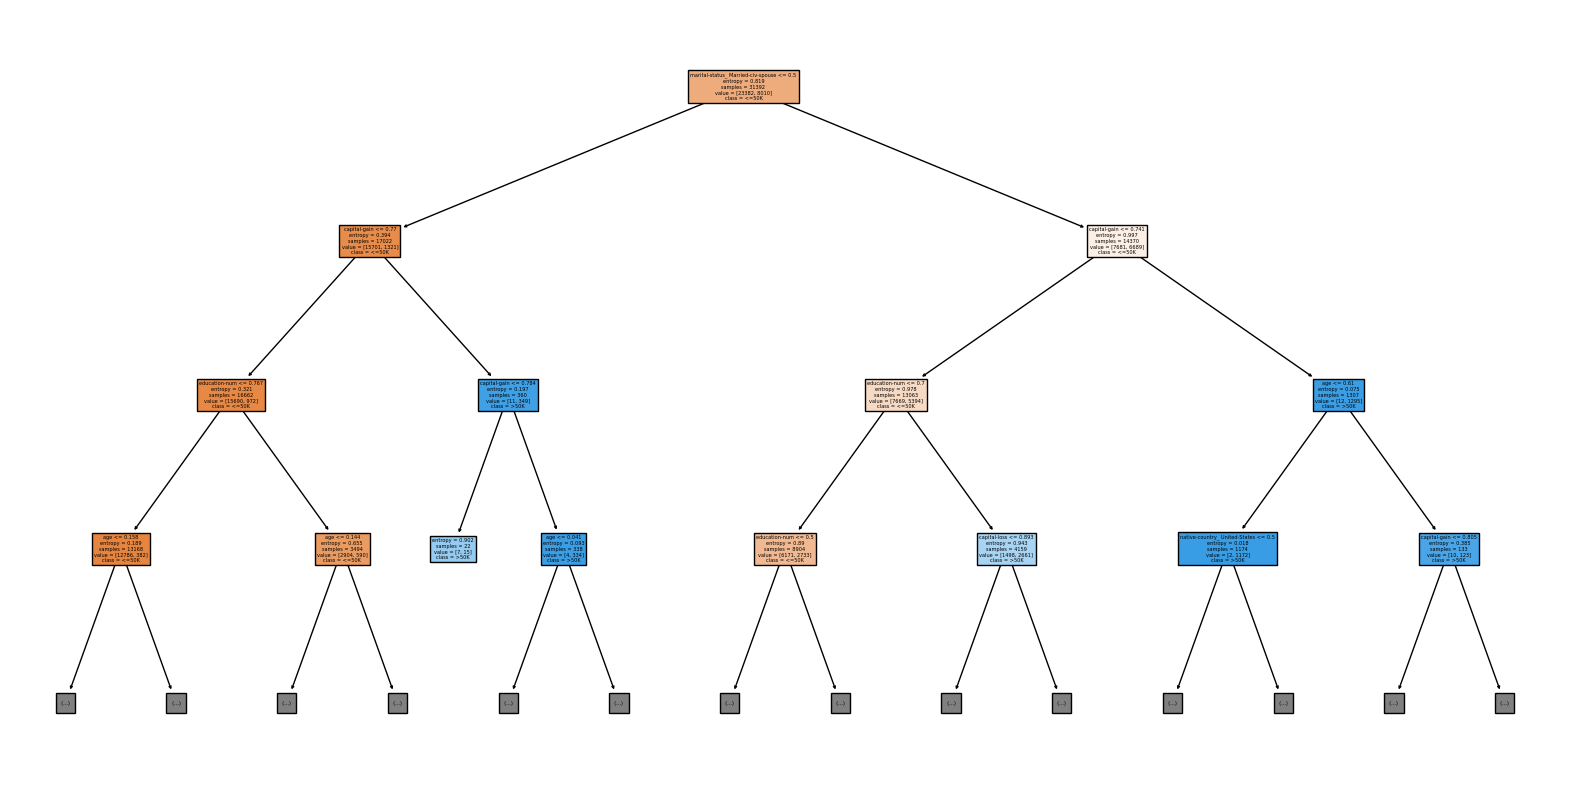

In [39]:
from sklearn.tree import  plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(best_model, max_depth=3, feature_names=X.columns, class_names=['<=50K', '>50K'], filled=True)
plt.show()

##  Adaboost Algorithm 

In [35]:
# Calculate the correlation matrix
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix to avoid duplicate pairs
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Find features with correlation greater than a threshold (e.g., 0.5)
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.5)]

print("Highly correlated features:", high_corr_features)


Highly correlated features: ['marital-status_ Never-married', 'relationship_ Not-in-family', 'race_ White']


In [36]:
# handle imbalancing data 
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [37]:
print(y.value_counts(normalize=True)) # it is empbalanced data 

income
0    0.5
1    0.5
Name: proportion, dtype: float64


In [39]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Dataset splitting (replace X and y with your data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Base estimator with best parameter
base_est = DecisionTreeClassifier(max_depth=3)  # Best max_depth

# AdaBoost model with best parameters (to run faster, skipping GridSearch)
adaboost = AdaBoostClassifier(
    estimator=base_est,
    n_estimators=100,         # Best number of estimators
    learning_rate=0.5,        # Best learning rate
    random_state=42
)

# Fit the model
adaboost.fit(X_train, y_train)

# Predictions
y_pred = adaboost.predict(X_test)

# Evaluate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.3f}")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Detailed classification report (optional)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

C:\Users\myacoubalex\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


F1 Score: 0.904
Accuracy: 0.90
Confusion Matrix:
[[8105  683]
 [1007 7764]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      8788
           1       0.92      0.89      0.90      8771

    accuracy                           0.90     17559
   macro avg       0.90      0.90      0.90     17559
weighted avg       0.90      0.90      0.90     17559




The model demonstrates strong performance, with training accuracy of 83.59% and testing accuracy of 82.79%. The F1 score is also consistent, with 83.03% on the training set and 82.24% on the testing set. The classification report for the testing set reveals that class <=50K , the majority class, performs well with a precision of 0.87, recall of 0.91, and F1 score of 0.89. In contrast, class >50K, the minority class, shows lower performance with a precision of 0.69, recall of 0.57, and F1 score of 0.63. The overall accuracy is 83%, and the weighted average shows strong performance due to the dominance of class <=50K in the dataset. The macro average, which treats all classes equally, reveals slightly lower performance, reflecting the challenges the model faces with the minority class.

## **Comperative Analysis**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


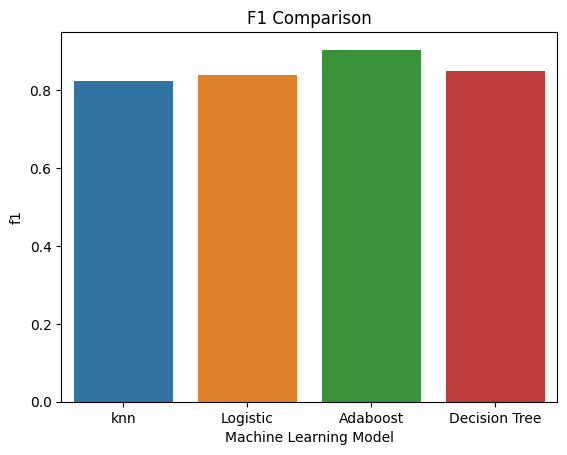

In [43]:
models = ["knn", "Logistic", "Adaboost", "Decision Tree"] 
f1_test = [0.822561662273838, 0.8383793411164876, 0.904, 0.849]

fig, ax = plt.subplots()
barplot = sns.barplot(x=models, y=f1_test, ax=ax)

# Set the title and labels#
plt.title("F1 Comparison")
plt.xlabel("Machine Learning Model")
plt.ylabel("f1")

plt.show()